Author : Rahul Barchha

GRIP@The Sparks Foundation

Task 1 : Prediction Using Supervised ML

In this Task we will predict the score that students are expected to score based upon the number of hours they studied Data can be found at this link http://bit.ly/w-data

What Will be predicted score if a student studies for 9.25 hrs in a day?

**Step 1 :- Importing the Libraries and Dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
%matplotlib inline

In [ ]:
dataset = pd.read_csv("http://bit.ly/w-data")
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


- Dataset consists 25 examples with no null values.
- Max value of hours studied is 9.2 hrs.
- Max value of Scores is 95%.

**Step 2 : Visualizing the Dataset**

Text(0, 0.5, 'Percentage Score')

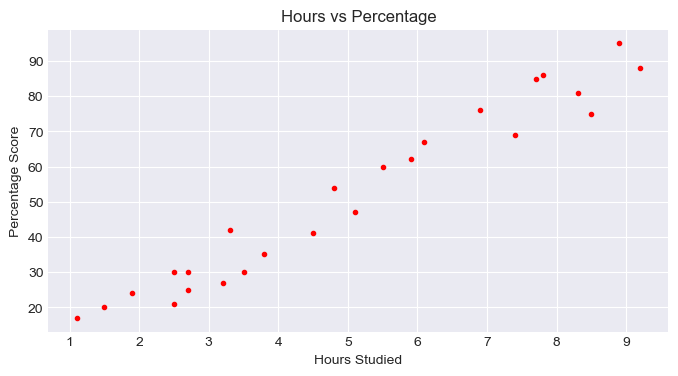

In [ ]:
plt.figure(figsize = (8,4), dpi = 100)

plt.scatter(x = dataset['Hours'], y = dataset['Scores'], marker = '.', color = 'red')
plt.title('Hours vs Percentage')                    
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')

- The graph shows that there is positive linear realtionship between the number of Hours studies and Percentage Score.

**Step 3 : Preparing the Dataset**



In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Step 4 : Training the Model(Linear Regression)**

In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)
coef = regressor.coef_
intercept = regressor.intercept_
print("Coefficient : {}".format(coef))
print("Intercept : {}".format(intercept))

Coefficient : [9.91065648]
Intercept : 2.018160041434683


**Step 5 : Visualizing the result**

Text(0, 0.5, 'Percentage Score')

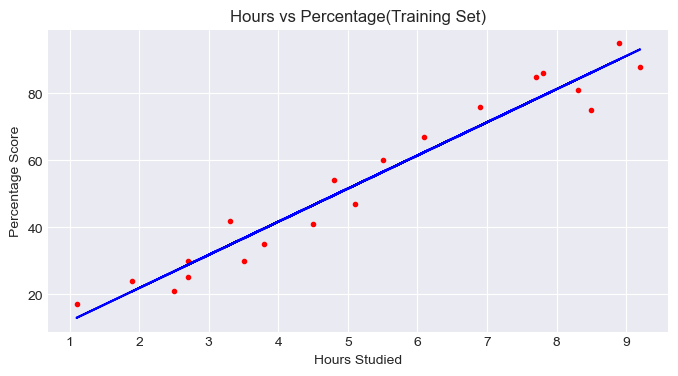

In [ ]:
plt.figure(figsize = (8,4), dpi = 100)

plt.scatter(x = X_train, y = y_train, marker = '.', color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')

plt.title('Hours vs Percentage(Training Set)')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')

**Step 6 : Making Predictions**

In [ ]:
y_pred = regressor.predict(X_test)
y_pred
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Text(0, 0.5, 'Percentage Score')

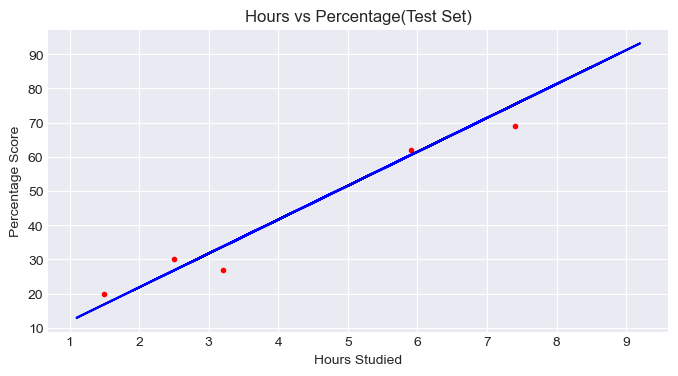

In [ ]:
plt.figure(figsize = (8,4), dpi = 100)

plt.scatter(x = X_test, y = y_test, marker = '.', color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')

plt.title('Hours vs Percentage(Test Set)')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')

We have compared test data with predicted data. Above graph shows that regression line has fitted well to the test data.

In [ ]:
hours = 7.5
score = regressor.predict([[hours]])
print("With {} hours of Study you can achieve {} percentage".format(hours, round(score[0],2)))

With 7.5 hours of Study you can achieve 76.35 percentage


**Final Step : Evaluating the Model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. We'll do this by using Scikit-Learn's built-in metrics method. There are many such metrics.

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
